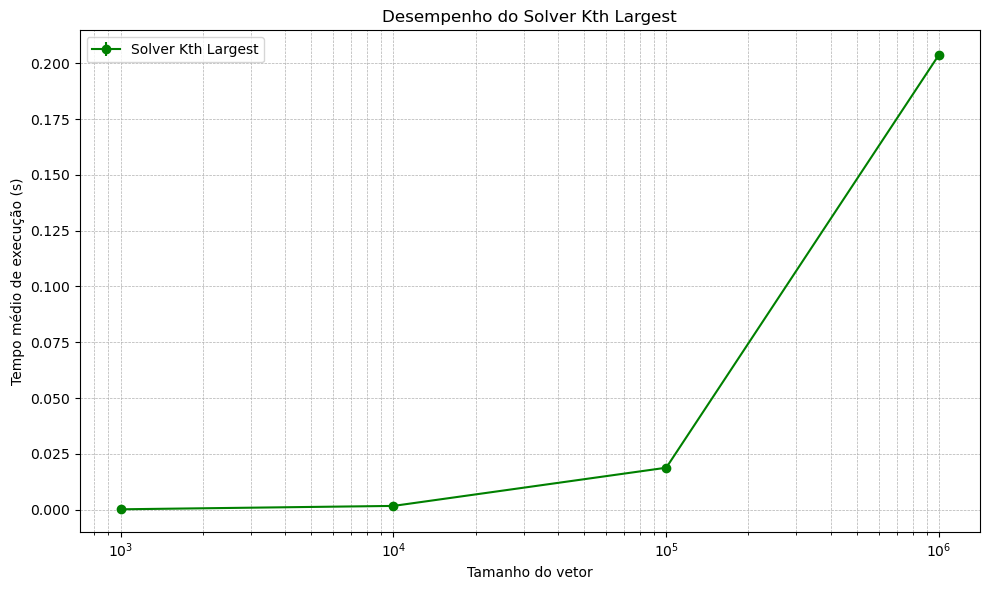

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.stats import t

# Configurações gerais
np.random.seed(42)  # Garantir reprodutibilidade
tamanhos = [10**3, 10**4, 10**5, 10**6]  # Tamanhos dos vetores
execucoes = 10  # Número de execuções por tamanho

# Desafio 2: Solver Kth Largest
def solver_kth_largest(vetor, k=5):
    return sorted(vetor, reverse=True)[k-1]

def medir_tempo(algoritmo, vetor, *args):
    tempos = []
    for _ in range(execucoes):
        inicio = time.time()
        algoritmo(vetor, *args)
        fim = time.time()
        tempos.append(fim - inicio)
    return np.mean(tempos), np.std(tempos)

# Armazenar resultados para o desafio 2
resultados_kth_largest = {"medias": [], "desvios": []}

# Avaliar o algoritmo solver_kth_largest
for tamanho in tamanhos:
    vetor = np.random.randint(0, 1000, tamanho)
    media, desvio = medir_tempo(solver_kth_largest, vetor, 5)
    resultados_kth_largest["medias"].append(media)
    resultados_kth_largest["desvios"].append(desvio)

# Calcular intervalo de confiança para o desafio 2
intervalos_kth_largest = []
for i in range(len(tamanhos)):
    n = execucoes
    desv = resultados_kth_largest["desvios"][i]
    media = resultados_kth_largest["medias"][i]
    t_valor = t.ppf(0.975, df=n-1)  # 95% de confiança
    intervalo = t_valor * (desv / np.sqrt(n))
    intervalos_kth_largest.append(intervalo)

# Gerar gráfico para o desafio 2
plt.figure(figsize=(10, 6))
plt.errorbar(tamanhos, resultados_kth_largest["medias"], 
             yerr=intervalos_kth_largest, fmt='-o', color='green', label="Solver Kth Largest")
plt.xlabel('Tamanho do vetor')
plt.ylabel('Tempo médio de execução (s)')
plt.title('Desempenho do Solver Kth Largest')
plt.xscale('log')
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('grafico_solver_kth_largest.png')
plt.show()

# Salvar resultados para o desafio 2
with open("resultados_kth_largest.txt", "w") as f:
    f.write("Resultados do Solver Kth Largest:\n")
    for i, tamanho in enumerate(tamanhos):
        f.write(f"Tamanho: {tamanho}, Média: {resultados_kth_largest['medias'][i]:.6f} s, Intervalo: ±{intervalos_kth_largest[i]:.6f} s\n")

In [2]:
!cat resultados_kth_largest.txt

Resultados do Solver Kth Largest:
Tamanho: 1000, Média: 0.000124 s, Intervalo: ±0.000003 s
Tamanho: 10000, Média: 0.001645 s, Intervalo: ±0.000011 s
Tamanho: 100000, Média: 0.018766 s, Intervalo: ±0.000052 s
Tamanho: 1000000, Média: 0.203920 s, Intervalo: ±0.000652 s
